## 한겨레 신문사 스크롤링

레이디버그와 다른 점은 각각 기사를 클릭하고 들어가야한다는 점. 

1) 각 기사의 url 을 긁어와야함

# '비트코인' 키워드 기사 검색 url / 기간 - all
http://search.hani.co.kr/Search?command=query&keyword=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&sort=d&period=all&media=news






In [57]:
import urllib.request
from bs4 import BeautifulSoup
import re
import os

## 1. 각 기사들의 url 긁어오기

# date : p - date_time class
# article address : dt - a - href
# article text : div - text class


def fetch_list_url():
    params = []
    for i in range(2):
        list_url = 'http://search.hani.co.kr/Search?command=query&keyword=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&media=news&sort=d&period=all&datefrom=2000.01.01&dateto=2017.12.29&pageseq='+str(i)
        url = urllib.request.Request(list_url) #html 파일 달라고 요청 
        res = urllib.request.urlopen(url).read().decode("utf-8") #html 을 utf-8 으로 디코딩

        soup = BeautifulSoup(res, "html.parser")  #bs 을 이용해서 검색할수있도록 res 를 넣어줌

        #date_result = soup.find_all ('dd',class_='date')  
        
        article_result = soup.find_all('dt')
        
        for link in soup.find_all('dt'): 
            for i in link: # dt 태그 밑에있는 a 태그를 갖고오려고 루프를 한번 더 돌린것 
                params.append(i.get('href'))
    
    return(params)
################################## // 기사 제목 주소 params 에 리스트로 붙여넣기
def fetch_list_url2():
    list_url = fetch_list_url()
    result = []
    for i in range(len(list_url)):
        url = urllib.request.Request(params[i]) #html 파일 달라고 요청 
        res = urllib.request.urlopen(url).read().decode("utf-8") #html 을 utf-8 으로 디코딩

        soup = BeautifulSoup(res, "html.parser")  #bs 을 이용해서 검색할수있도록 res 를 넣어줌

        text_result = soup.find_all('div',class_='text')
        date_result = soup.find_all('p',class_='date-time')
        
        for i,j in zip(text_result,date_result):
            result.append(i.get_text('',strip=True))
            result.append(j.get_text('',strip=True))
    return result

 
f = open('output1.txt', 'w')
f.writelines(fetch_list_url2())
f.close()

In [ ]:
## 변수의 내용을 파일로 저장하는 방법
text = 'qweqweqwe'
f = open('path','w',encoding='utf-8')
f.write(text)
f.close


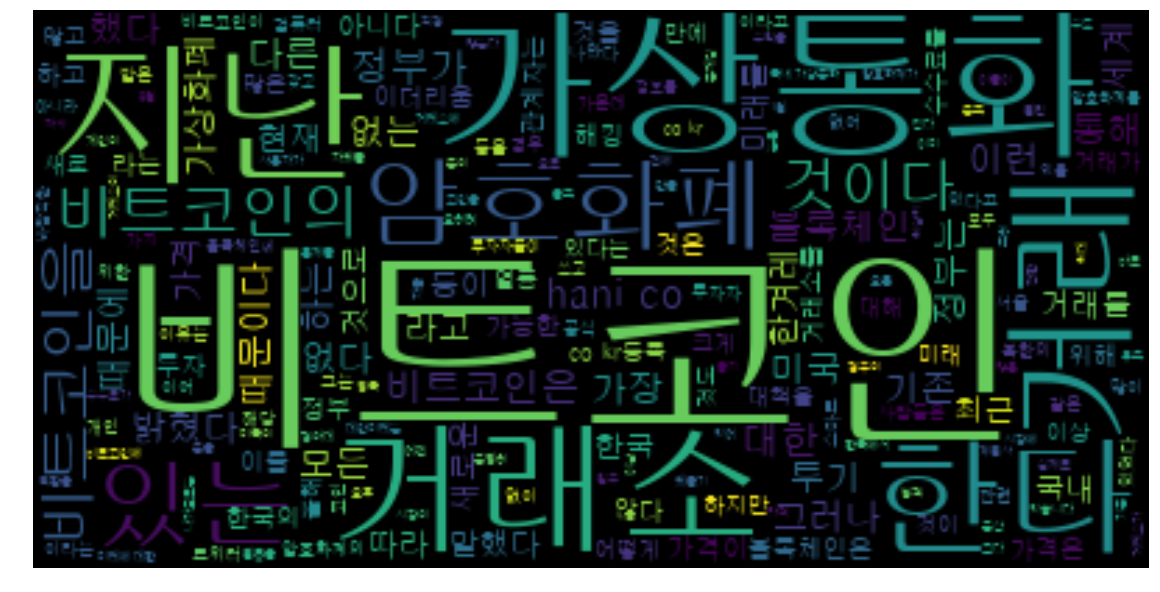

In [58]:
## 워드 클라우드 

import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
%matplotlib inline
from wordcloud import WordCloud

text = open("/Users/aiden/Desktop/Python/Web_scrolling/output1.txt").read()

stopwords = set(STOPWORDS)
stopwords.add("있다")

wordcloud = WordCloud(font_path='/Users/aiden/Downloads/H2GPRM.TTF', stopwords=stopwords).generate(text)

wordcloud.words_


plt.figure(figsize = (20,20)) #총 그림 사이즈
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off") # axis off
plt.show()